In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error as mse
from sklearn.cross_validation import train_test_split
import time
import sys
import time
import pickle

try:
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    import matplotlib.pyplot as plt
except:
    pass

%pylab inline
import GPyOpt
import GPy
from scipy import optimize as opt

/home/lisov/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


# Rosenbrock to optimize

In [3]:
def reshape(x,input_dim):
    x = np.array(x)
    if x.size ==input_dim:
        x = x.reshape((1,input_dim))
    return x

In [4]:
### TWO_DIMENTIONAL ###

class function2d:
    
    def plot(self):
        bounds = self.bounds
        x1 = np.linspace(bounds[0][0], bounds[0][1], 100)
        x2 = np.linspace(bounds[1][0], bounds[1][1], 100)
        X1, X2 = np.meshgrid(x1, x2)
        X = np.hstack((X1.reshape(100*100,1),X2.reshape(100*100,1)))
        Y = self.f(X)  
            
        plt.figure()    
        plt.contourf(X1, X2, Y.reshape((100,100)),100)
        if (len(self.min)>1):    
            plt.plot(np.array(self.min)[:,0], np.array(self.min)[:,1], 'w.', markersize=20, label=u'Observations')
        else:
            plt.plot(self.min[0][0], self.min[0][1], 'w.', markersize=20, label=u'Observations')
        plt.colorbar()
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title(self.name)
        plt.show()


class rosenbrock(function2d):

    def __init__(self,bounds=None,sd=None):
        self.input_dim = 2
        if bounds is  None: self.bounds = [(-0.5,2),(-1.5,2)]
        else: self.bounds = bounds
        self.min = [(1, 1)]
        self.fmin = 0
        if sd==None: self.sd = 0
        else: self.sd=sd
        self.name = 'Rosenbrock'

    def f(self,X):
        X = reshape(X,self.input_dim)
        n = X.shape[0]
        if X.shape[1] != self.input_dim:
            return 'Wrong input dimension'
        else:
            fval = 100*(X[:,1]-X[:,0]**2)**2 + (X[:,0]-1)**2
            if self.sd ==0:
                noise = np.zeros(n).reshape(n,1)
            else:
                noise = np.random.normal(0,self.sd,n).reshape(n,1)
            return fval.reshape(n,1) + noise


In [5]:
### N_DIMENTIONAL ###

class rosenbrock_nd():

    def __init__(self, n_dim, bounds, sd=None):
        self.input_dim = n_dim
        self.bounds = bounds
        self.min = [1] * n_dim
        self.fmin = 0
        if sd==None: self.sd = 0
        else: self.sd=sd
        self.name = 'Rosenbrock_ND'

 
    def f(self,X):
        X = reshape(X,self.input_dim)
        n = X.shape[0]
        if X.shape[1] != self.input_dim:
            return 'Wrong input dimension'
        else:
            fval = 100*(X[:,1]-X[:,0]**2)**2 + (X[:,0]-1)**2
            if self.sd ==0:
                noise = np.zeros(n).reshape(n,1)
            else:
                noise = np.random.normal(0,self.sd,n).reshape(n,1)
            return fval.reshape(n,1) + noise

# Different functions for optimization

In [152]:
#ROSENBROCK TWO_DIM

func = rosenbrock()
#func.plot()
print(func.f((1,1)))

[[0.]]


In [89]:
#ROSENBROCK 4_DIM

func_4d = rosenbrock_nd(4, ((0, 2), (0, 2), (0, 2), (0, 2)))
print(func_4d.f((1, 1, 1, 1)))

[[0.]]


In [6]:
#ROSENBROCK 8_DIM

func_8d = rosenbrock_nd(8, ((0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2)))
print(func_8d.f((1, 1, 1, 1, 1, 1, 1, 1)))

[[0.]]


# Creating the field

In [158]:
#ROSENBROCK TWO_DIM

num = 10
x1 = np.linspace(0, 2, num)
x2 = np.linspace(0, 2, num)
X1, X2 = np.meshgrid(x1, x2)

X1_ = X1.reshape(num*num, 1)
X2_ = X2.reshape(num*num, 1)
X = np.hstack((X1_, X2_))

Y = func.f(X)

In [159]:
X_train = X.reshape(num*num, 2)
y_train = Y
#print(X_train)
print(f'Train shapes:{X_train.shape, y_train.shape}')

Train shapes:((100, 2), (100, 1))


In [ ]:
#ROSENBROCK 4_DIM

n_dim = 4    #size_of dimention
num = 10   #number of samples in the bounds

x1 = np.linspace(-1, 3, num)
x2 = np.linspace(-1, 3, num)
x3 = np.linspace(-1, 3, num)
x4 = np.linspace(-1, 3, num)
X1, X2, X3, X4 = np.meshgrid(x1, x2, x3, x4)

X1_ = X1.reshape(num**4, 1)
X2_ = X2.reshape(num**4, 1)
X3_ = X3.reshape(num**4, 1)
X4_ = X4.reshape(num**4, 1)

X_a = np.hstack((X1_, X2_))
X_b = np.hstack((X3_, X4_))
X   = np.hstack((X_a, X_b))
#print(X)

Y = func_4d.f(X)

In [ ]:
X_train = X.reshape(num**4, 4)
y_train = Y
#print(X_train)
print(f'Train shapes:{X_train.shape, y_train.shape}')

In [7]:
#ROSENBROCK 8_DIM

n_dim = 8    #size_of dimention
num = 4   #number of samples in the bounds

x1 = np.linspace(0,  2, num)
x2 = np.linspace(0,  2, num)
x3 = np.linspace(0,  2, num)
x4 = np.linspace(0,  2, num)
x5 = np.linspace(0,  2, num)
x6 = np.linspace(0,  2, num)
x7 = np.linspace(0,  2, num)
x8 = np.linspace(0,  2, num)
X1, X2, X3, X4, X5, X6, X7, X8 = np.meshgrid(x1, x2, x3, x4, x5, x6, x7, x8)

X1_ = X1.reshape(num**8, 1)
X2_ = X2.reshape(num**8, 1)
X3_ = X3.reshape(num**8, 1)
X4_ = X4.reshape(num**8, 1)
X5_ = X5.reshape(num**8, 1)
X6_ = X6.reshape(num**8, 1)
X7_ = X7.reshape(num**8, 1)
X8_ = X8.reshape(num**8, 1)

X_a = np.hstack((X1_, X2_))
X_b = np.hstack((X3_, X4_))
X_c = np.hstack((X5_, X6_))
X_d = np.hstack((X7_, X8_))

X_aa = np.hstack((X_a, X_b))
X_bb = np.hstack((X_c, X_d))

X   = np.hstack((X_aa, X_bb))
print(X)

Y = func_8d.f(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.66666667]
 [0.         0.         0.         ... 0.         0.         1.33333333]
 ...
 [2.         2.         2.         ... 2.         2.         0.66666667]
 [2.         2.         2.         ... 2.         2.         1.33333333]
 [2.         2.         2.         ... 2.         2.         2.        ]]


In [8]:
X_train = X.reshape(num**8, 8)
#Y = func_nd.f(X_train)
y_train = Y
#print(X_train)
print(f'Train shapes:{X_train.shape, y_train.shape}')

Train shapes:((65536, 8), (65536, 1))


# Creating NN

In [160]:
ndim = X_train.shape[1] #dimention
layers = [256,128,128,128]

learning_rate_decay = .97
start_learning_rate = 3e-4
learning_rate_schedule_epochs = 2000


tf.reset_default_graph()  #Clears the default graph stack and resets the global default graph.

# placeholders
x = tf.placeholder(tf.float32, [None, ndim]) #Inserts a placeholder for a tensor that will be always fed.
y_ = tf.placeholder(tf.float32, [None, 1])

learning_rate_ = tf.placeholder(tf.float32)
forces_coeff_ = tf.placeholder(tf.float32)
keep_probability_ = tf.placeholder(tf.float32, name='keep_probability')
l2_reg_ = tf.placeholder(tf.float32, name='l2reg')

# weights
W1 = tf.Variable(tf.truncated_normal([ndim, layers[0]], stddev=(2/ndim)**.5))
b1 = tf.Variable(tf.truncated_normal([layers[0]],  stddev=.1))
h1 = tf.nn.relu(tf.matmul(x, W1) + b1)
h_drop1 = tf.nn.dropout(h1, keep_probability_, noise_shape = [1,layers[0]])
Ws = [W1]; bs = [b1]; hs = [h_drop1]
for cnt_layer in range(1, len(layers)):
    Ws.append(tf.Variable(tf.truncated_normal([layers[cnt_layer - 1], layers[cnt_layer]], 
                                              stddev=(2/layers[cnt_layer - 1])**.5)))
    bs.append(tf.Variable(tf.truncated_normal([layers[cnt_layer]],  stddev=.1))) 
    hs.append(tf.nn.dropout(tf.nn.relu(tf.matmul(hs[-1], Ws[-1]) + bs[-1]), keep_probability_,
                            noise_shape = [1,layers[cnt_layer]])) # noise shape is important
Ws.append(tf.Variable(tf.truncated_normal([layers[-1], 1], stddev=.1)))
bs.append(tf.Variable(tf.truncated_normal([1],  stddev=.1)))

# losses and outputs
y = tf.matmul(hs[-1], Ws[-1]) + bs[-1]
l2_regularizer = sum(tf.nn.l2_loss(Wxxx) for Wxxx in Ws) 
mse_e = tf.losses.mean_squared_error(predictions = y, labels = y_)
loss = mse_e + l2_reg_*l2_regularizer

# some extra stuff for learning rate decay
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = start_learning_rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           learning_rate_schedule_epochs, learning_rate_decay, staircase=True)
#Applies exponential decay to the learning rate.

lr_fun = lambda: learning_rate
min_lr = lambda: tf.constant(1e-5)
actual_lr = tf.case([(tf.less(learning_rate, tf.constant(1e-5)), min_lr)], default=lr_fun)

train_step = tf.train.AdamOptimizer(learning_rate=actual_lr).minimize(loss, global_step=global_step)

In [161]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=True): # we need this to iterate over data
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

def get_errors(x_, y_): # return rmse, mae, maxae
    return [np.sqrt(mse(x_, y_)), np.mean(np.abs(x_ - y_)), np.max(np.abs(x_ - y_))]

def get_mcdues(X): # returns MCD UEs
    stds = np.zeros((X.shape[0], T), dtype = float)
    for cnt_ in range(T):
        stds[:, cnt_] = np.ravel(sess.run(y, feed_dict={x: X, 
                                                        keep_probability_: .5}))
    return np.std(stds, axis = 1)

In [162]:
try:
    sess.close()
except:
    pass

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

init = tf.global_variables_initializer()
saver = tf.train.Saver()
sess = tf.Session(config = config)
sess.run(init)
epoch = 0
data = []

In [163]:
batch_size = 10 # please note that I used GPU and maybe you want to decrease the batch size to 200 or so
init_epochs = 5000
keep_probs = [.5, .75, .9]
l2_reg = 1e-4
check_step = 500

T = 25

# Learing the NN on our field

In [117]:
### 8_DIMENTIONAL ###

t = time.time()
for keep_prob in keep_probs:
    for cnt in range(init_epochs):
        epoch += 1

        for batch in iterate_minibatches(X_train, y_train, batch_size):
            X_batch, y_batch = batch
            sess.run(train_step, feed_dict={x: X_batch, 
                                            y_: y_batch, 
                                            keep_probability_: keep_prob, 
                                            l2_reg_: l2_reg})
        if (epoch+1) % check_step == 0:
            print(np.round(time.time() - t, 2), end='s')
            t = time.time()
            preds_train = sess.run(y, feed_dict={x: X_train, keep_probability_: 1})

            train_err =  get_errors(preds_train, y_train)
            print(' &', np.round(time.time() - t, 2), 's')
            print(epoch, np.round(train_err, 4), end = '|')

458.08s & 0.19 s
499 [ 63.0664  43.3303 194.7807]|494.16s & 0.17 s
999 [ 70.5476  48.756  208.1794]|492.36s & 0.21 s
1499 [ 67.3916  45.9221 202.7691]|495.46s & 0.17 s
1999 [ 63.9749  40.7165 202.994 ]|494.75s & 0.17 s
2499 [ 66.1768  44.2887 201.9872]|514.32s & 0.17 s
2999 [ 64.7272  42.6893 199.5532]|529.72s & 0.17 s
3499 [ 64.398   42.0645 199.5987]|538.93s & 0.17 s
3999 [ 67.4516  45.8159 200.4568]|456.69s & 0.17 s
4499 [ 65.9372  44.6791 195.7047]|699.4s & 0.19 s
4999 [ 60.0388  38.6314 189.5469]|387.99s & 0.16 s
5499 [27.2708 16.6671 91.6654]|459.76s & 0.17 s
5999 [28.6865 18.3046 92.938 ]|466.5s & 0.17 s
6499 [27.9562 17.4097 92.0063]|441.04s & 0.17 s
6999 [26.5962 15.2906 92.0933]|427.06s & 0.16 s
7499 [28.6813 17.9755 94.3328]|458.27s & 0.17 s
7999 [27.0997 17.1652 88.9455]|427.54s & 0.17 s
8499 [28.2027 18.1136 89.6914]|467.64s & 0.17 s
8999 [27.1276 16.8017 91.1541]|394.67s & 0.16 s
9499 [25.1943 15.5862 85.0071]|443.66s & 0.17 s
9999 [24.5348 15.0592 84.2438]|441.25s & 0.17

# LEARING TWO_DIM

In [164]:
### TWO_DIMENTIONAL ###

t = time.time()
for keep_prob in keep_probs:
    for cnt in range(init_epochs):
        epoch += 1

        for batch in iterate_minibatches(X_train, y_train, batch_size):
            X_batch, y_batch = batch
            sess.run(train_step, feed_dict={x: X_batch, 
                                            y_: y_batch, 
                                            keep_probability_: keep_prob, 
                                            l2_reg_: l2_reg})
        if (epoch+1) % check_step == 0:
            print(np.round(time.time() - t, 2), end='s')
            t = time.time()
            preds_train = sess.run(y, feed_dict={x: X_train, keep_probability_: 1})

            train_err =  get_errors(preds_train, y_train)
            print(' &', np.round(time.time() - t, 2), 's')
            print(epoch, np.round(train_err, 4), end = '|')

5.25s & 0.02 s
499 [102.9489  61.5188 371.7258]|5.48s & 0.0 s
999 [ 87.9767  56.195  289.652 ]|5.04s & 0.0 s
1499 [ 84.0604  57.9521 317.3534]|5.41s & 0.0 s
1999 [ 68.4255  49.5481 243.6906]|5.47s & 0.0 s
2499 [ 93.5648  68.3367 274.7352]|5.13s & 0.0 s
2999 [108.629   78.5891 283.9715]|5.25s & 0.0 s
3499 [101.6273  73.9891 251.5437]|5.3s & 0.0 s
3999 [ 79.3453  58.2651 217.1538]|5.07s & 0.0 s
4499 [ 82.0272  60.6203 194.4826]|5.13s & 0.0 s
4999 [ 81.6962  59.3835 210.888 ]|5.02s & 0.0 s
5499 [28.5377 21.4061 82.1747]|5.16s & 0.0 s
5999 [36.0555 26.5061 82.6622]|5.12s & 0.0 s
6499 [25.0595 17.8149 76.5379]|5.23s & 0.0 s
6999 [23.4352 16.6337 72.8416]|5.1s & 0.0 s
7499 [38.3914 27.8024 90.3943]|5.06s & 0.0 s
7999 [33.0292 24.0883 80.3202]|5.1s & 0.0 s
8499 [22.6381 15.4934 69.9127]|5.18s & 0.0 s
8999 [ 49.1577  34.5645 127.2532]|4.91s & 0.0 s
9499 [23.7629 16.3159 72.3828]|5.17s & 0.0 s
9999 [39.1407 28.7283 91.7929]|5.05s & 0.0 s
10499 [11.4925  8.1375 34.7821]|5.1s & 0.0 s
10999 [12.57

In [ ]:
def NN(x_test):
    epoch = 0
    for keep_prob in keep_probs:
        for cnt in range(init_epochs):
            epoch += 1

            for batch in iterate_minibatches(x_test, y_train, batch_size):
                X_batch, y_batch = batch
                sess.run(train_step, feed_dict={x: X_batch, 
                                            y_: y_batch, 
                                            keep_probability_: keep_prob, 
                                            l2_reg_: l2_reg})

# Our result from NN

In [165]:
def get_assessed_val(x_test):
    m = preds_test = sess.run(y, feed_dict= {x: x_test , keep_probability_: 1})
    s = get_mcdues(x_test)
    return m, s

# BO with GPyOpt     droppedout

In [47]:
### 8_DIMENTIONAL ###

objective = GPyOpt.core.task.SingleObjective(func_8d.f)

space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_2', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_3', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_4', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_5', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_6', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_7', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_8', 'type': 'continuous', 'domain': (0, 2)}])

model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False)

aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)      #, optimizer='DIRECT')  #too long

initial_design = GPyOpt.experiment_design.initial_design('random', space, 5)

In [167]:
#VERSION 3.0
from GPyOpt.acquisitions.base import AcquisitionBase
from GPyOpt.acquisitions.EI import AcquisitionEI
from scipy.special import erfc


class Exp_impr(AcquisitionBase):
    
    analytical_gradient_prediction = False
    
    def __init__(self, model, space, optimizer=None, cost_withGradients=None):
        super(Exp_impr, self).__init__(model, space, optimizer)

        self.EI = AcquisitionEI(model, space, optimizer, cost_withGradients)
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[None,:]
        m, s = get_assessed_val(x)
        s = np.clip(s, 1e-10, np.inf)
        return -m, s
    
    def acquisition_function(self,x):
        acqu_x = np.zeros((x.shape[0],1))

        m, s = self.model.predict(x)
        fmin = self.model.get_fmin()

        if isinstance(s, np.ndarray):
            s[s<1e-10] = 1e-10
        elif s< 1e-10:
            s = 1e-10
        u = (fmin - m)/s
        phi = np.exp(-0.5 * u**2) / np.sqrt(2*np.pi)
        Phi = 0.5 * erfc(-u / np.sqrt(2))
        
        f_acqu = s * (u * Phi + phi)
        cost_x, _ = self.cost_withGradients(x)
        acqu_x = -(f_acqu*self.space.indicator_constraints(x))/cost_x
       
        return acqu_x

In [49]:
### 8_DIMENTIONAL ###

acquisition = Exp_impr(model, space, optimizer=aquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

bo = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, initial_design)

In [169]:
### TWO_DIMENTIONAL ###

acquisition = Exp_impr(model, space, optimizer=aquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

bo_2d = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, initial_design)

In [50]:
### 8_DIMENTIONAL ###

max_iter = 400
max_time = 60 * 60
eps = 1e-10

bo.run_optimization(max_iter, max_time) #, eps) 

In [170]:
### TWO_DIMENTIONAL ###

max_iter = 100
max_time = 60 * 15
eps = 1e-10

bo_2d.run_optimization(max_iter, max_time) #, eps) 

# BO with GPyOpt  itself

In [67]:
### 8_DIMENTIONAL ###

bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_2', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_3', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_4', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_5', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_6', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_7', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_8', 'type': 'continuous', 'domain': (0, 2)}]

bo_gpy = GPyOpt.methods.BayesianOptimization(func_8d.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)    

In [171]:
### TWO_DIMENTIONAL ###

bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_2', 'type': 'continuous', 'domain': (0, 2)}]

bo_gpy_2d = GPyOpt.methods.BayesianOptimization(func.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)    

In [68]:
### 8_DIMENTIONAL ###

max_iter = 400
max_time = 60 * 60
eps = 1e-10

bo_gpy.run_optimization(max_iter, max_time, verbosity=False)            

In [173]:
### TWO_DIMENTIONAL ###

max_iter = 100
max_time = 60 * 15
eps = 1e-10

bo_gpy_2d.run_optimization(max_iter, max_time, verbosity=False)            

# Comparizon of results

In [69]:
### 8_DIMENTIONAL ###

print('BO_dropNN:   x_min = ', np.round(bo.x_opt, 2),     'f_min = ', np.round(bo.fx_opt, 5))
print('BO__GPyOpt:  x_min = ', np.round(bo_gpy.x_opt, 2), 'f_min = ', np.round(bo_gpy.fx_opt, 5))

BO_dropNN:   x_min =  [1.08 1.18 0.37 1.21 0.18 0.14 1.36 1.74] f_min =  0.00827
BO__GPyOpt:  x_min =  [0.93 0.86 1.85 2.   1.09 1.58 0.91 0.88] f_min =  0.00999


In [174]:
### TWO_DIMENTIONAL ###

print('BO_dropNN:   x_min = ', np.round(bo_2d.x_opt, 2),     'f_min = ', np.round(bo_2d.fx_opt, 5))
print('BO__GPyOpt:  x_min = ', np.round(bo_gpy_2d.x_opt, 2), 'f_min = ', np.round(bo_gpy_2d.fx_opt, 5))

BO_dropNN:   x_min =  [0.99 0.98] f_min =  0.00019
BO__GPyOpt:  x_min =  [0.95 0.91] f_min =  0.00234


In [176]:
def new_plot_convergence(ModularBayesianOptimization, BayesianOptimization, filename = None):
    
    n = bo_2d.X.shape[0]
    m = bo_gpy_2d.X.shape[0]
    
    plt.subplot(1, 1, 1)
    
    plt.plot(list(range(n)), bo_2d.Y_best,'-o', label='1')
    plt.plot(list(range(m)), bo_gpy_2d.Y_best,'-o', label='2')

    
    plt.title('Value of the best selected sample')
    plt.xlabel('Iteration')
    plt.ylabel('Best y')
    grid(True)
    
    legend(('Bo_dropped_NN','Bo_GPy'))
    

    if filename!=None:
        savefig(filename)
    else:
        plt.semilogy(basey = 10)
        plt.show()

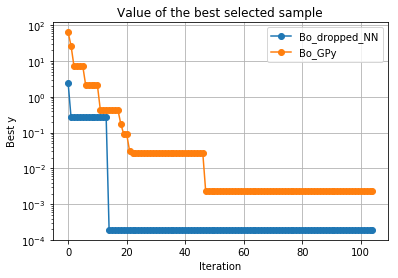

In [180]:
### 8_DIMENTIONAL ###

new_plot_convergence(bo, bo_gpy)

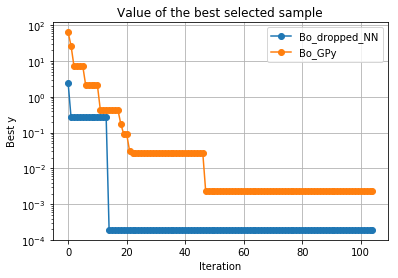

In [181]:
### TWO_DIMENTIONAL ###

new_plot_convergence(bo_2d, bo_gpy_2d)

In [166]:
# TWO_DIM

objective = GPyOpt.core.task.SingleObjective(func.f)

space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_2', 'type': 'continuous', 'domain': (0, 2)}])

model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False)

aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)      #, optimizer='DIRECT')  #too long

initial_design = GPyOpt.experiment_design.initial_design('random', space, 5)

# DIFFERENT

In [ ]:
#print('BO_with_droppedoutNN: ')
#bo.plot_acquisition()
#print('BO_only_with_GPyOpt:  ')
#bo_without_NN.plot_acquisition()

#bo.plot_convergence()
#bo_gpy.plot_convergence()

In [ ]:
     '''
        t_new = time.time()
        if abs(t_new - self.t) > 30:
            fx_opt = self.fx_opt
            print(np.round(-self.t_global + t_new, 0), 's |', 'fmin = ', np.round(-fmin, 3))
            self.t = time.time()
     '''

In [127]:
#JITTER VERSION

from GPyOpt.acquisitions.base import AcquisitionBase
from GPyOpt.acquisitions.EI import AcquisitionEI
from numpy.random import beta
from scipy.special import erfc


class Exp_impr(AcquisitionBase):
    
    analytical_gradient_prediction = False
    
    def __init__(self, model, space, optimizer=None, cost_withGradients=None, par_a=1, par_b=1, num_samples= 10):
        super(Exp_impr, self).__init__(model, space, optimizer)
        
        self.par_a = par_a
        self.par_b = par_b
        self.num_samples = num_samples
        self.samples = beta(self.par_a,self.par_b,self.num_samples)
        self.EI = AcquisitionEI(model, space, optimizer, cost_withGradients)
        #self.t = time.time()
        #self.t_global = self.t
        
    def compute_exp_impr(self, x):
        jitter = self.EI.jitter
        m, s = self.model.predict(x)
        fmin = self.model.get_fmin()
        phi, Phi, u = self.get_quantiles(jitter, fmin, m, s)
        
        f_acqu = s * (u * Phi + phi)
        cost_x, _ = self.cost_withGradients(x)
        return -(f_acqu*self.space.indicator_constraints(x))/cost_x
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[None,:]
        m, s = get_assessed_val(x)
        s = np.clip(s, 1e-10, np.inf)
        return -m, s

    def get_quantiles(self, acquisition_par, fmin, m, s):
    
        if isinstance(s, np.ndarray):
            s[s<1e-10] = 1e-10
        elif s< 1e-10:
            s = 1e-10
        u = (fmin - m - acquisition_par)/s
        phi = np.exp(-0.5 * u**2) / np.sqrt(2*np.pi)
        Phi = 0.5 * erfc(-u / np.sqrt(2))
        return (phi, Phi, u)
    
    def acquisition_function(self,x):
        acqu_x = np.zeros((x.shape[0],1))       
        for k in range(self.num_samples):
            self.EI.jitter = self.samples[k]   
            acqu_x = acqu_x + self.compute_exp_impr(x)        
        return acqu_x/self.num_samples

In [ ]:
acquisition = Exp_impr(model, space, optimizer=aquisition_optimizer, par_a=1, par_b=10, num_samples=200)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

bo = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, initial_design)